## Lesson 6. Summary Activity for Time Series Data

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

In [2]:
# Handle datetime conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [4]:
data_path = et.data.get_data('colorado-flood')

stream_discharge_path = os.path.join(data_path, 'discharge', '06730200-discharge-daily-1986-2013.csv')
stream_discharge_path

'C:\\Users\\Glen Shennan\\earth-analytics\\data\\colorado-flood\\.\\discharge\\06730200-discharge-daily-1986-2013.csv'

### Challenge 1: Explore Data & Metadata

1. Delimiter = Tab for .txt, comma for .csv
2. Units = cubic feet / second
3. Where collected = BOULDER CREEK AT NORTH 75TH ST. NEAR BOULDER, CO
4. Frequency = Daily
5. Each number represents = mean for the day

#### Challenge 2: Open and Plot CSV with Time Series Data

Read the data in a DataFrame

In [5]:
stream_discharge_1986_2013 = pd.read_csv(stream_discharge_path,
                                         parse_dates=['datetime'],
                                         index_col=['datetime'])
stream_discharge_1986_2013.head()

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A


In [6]:
stream_discharge_1986_2013.describe()

,site_no,disValue
count,9954.0,9954.000000
mean,6730200.0,93.712645
std,0.0,143.942426
min,6730200.0,0.870000
25%,6730200.0,32.000000
50%,6730200.0,54.000000
75%,6730200.0,108.000000
max,6730200.0,4770.000000


Plot with matplotplib

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Discharge (cuF/s)'),
 Text(0.5, 1.0, 'Daily Discharge 1986-2013\nBoulder, CO')]

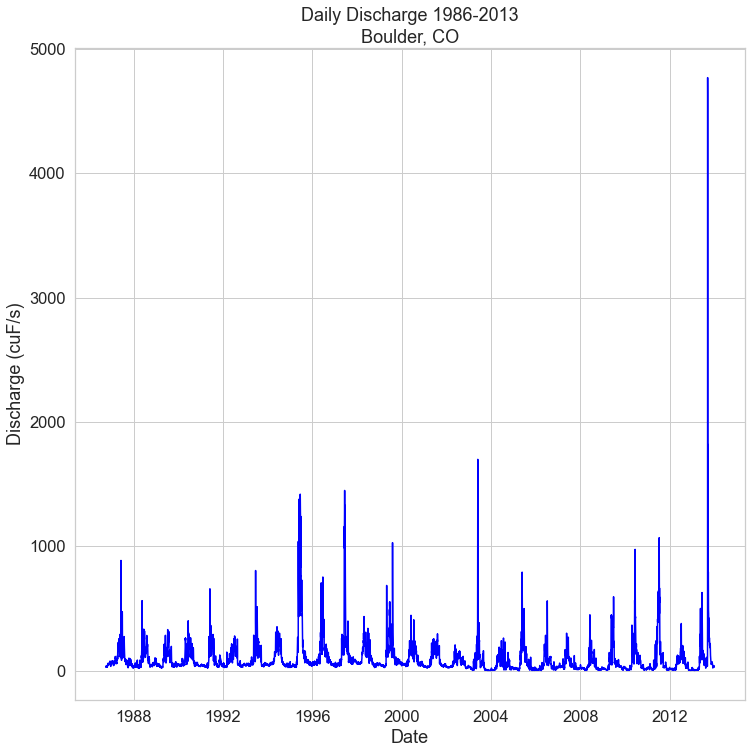

In [7]:
f, ax = plt.subplots(figsize=(12,12))

ax.plot(stream_discharge_1986_2013.index.values,
       stream_discharge_1986_2013['disValue'],
       color='blue')
ax.set(xlabel='Date',
       ylabel='Discharge (cuF/s)',
       title='Daily Discharge 1986-2013\nBoulder, CO')

#### Challenge 3: Subset the Data

In [8]:
stream_discharge_aug_oct_2013 = stream_discharge_1986_2013['2013-08-01':'2013-10-31']
stream_discharge_aug_oct_2013.head()

,agency_cd,site_no,disValue,qualCode
datetime,,,,
2013-08-01,USGS,6730200,64.0,A
2013-08-02,USGS,6730200,68.0,A
2013-08-03,USGS,6730200,65.0,A
2013-08-04,USGS,6730200,65.0,A
2013-08-05,USGS,6730200,62.0,A


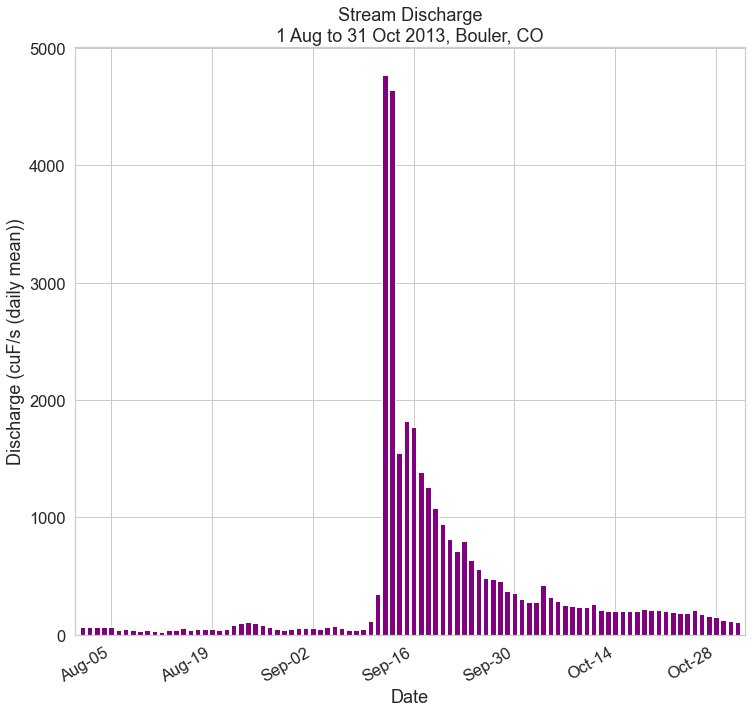

In [9]:
f, ax = plt.subplots(figsize=(12,12))

f.autofmt_xdate()
date_form = DateFormatter( '%b-%d')

ax.bar(stream_discharge_aug_oct_2013.index.values,
        stream_discharge_aug_oct_2013['disValue'],
        color='purple')
ax.set(xlabel='Date',
       ylabel='Discharge (cuF/s (daily mean))',
       title='Stream Discharge\n1 Aug to 31 Oct 2013, Bouler, CO',
       xlim=['2013-07-31','2013-11-01'])
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))

#### Challege 4: Resample the Data

In [10]:
stream_discharge_aug_oct_2013_weekly = stream_discharge_aug_oct_2013.resample('W').max()

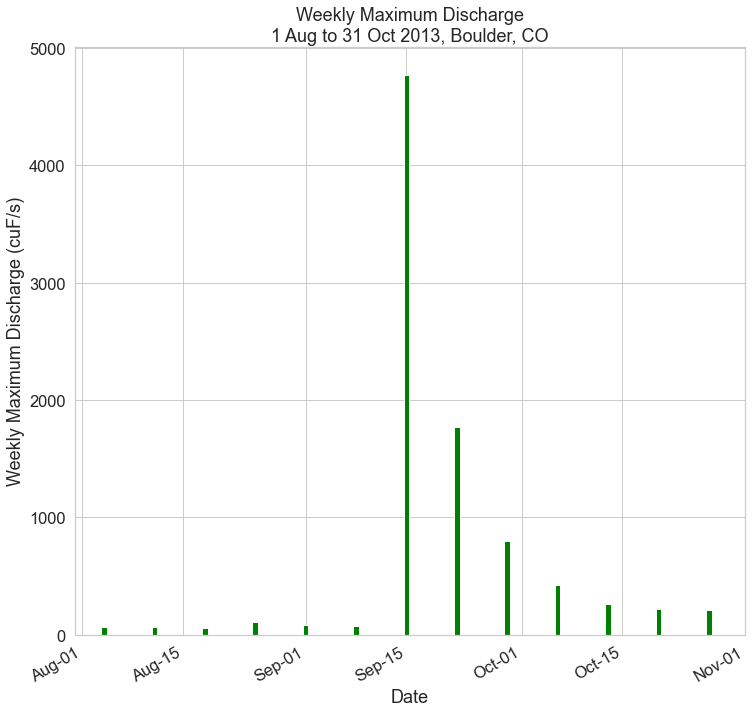

In [11]:
f, ax = plt.subplots(figsize=(12,12))
f.autofmt_xdate()

ax.bar(stream_discharge_aug_oct_2013_weekly.index.values,
           stream_discharge_aug_oct_2013_weekly['disValue'],
           color='green')
ax.set(xlabel='Date',
       ylabel='Weekly Maximum Discharge (cuF/s)',
       title='Weekly Maximum Discharge\n1 Aug to 31 Oct 2013, Boulder, CO',
       xlim=['2013-07-31', '2013-11-01'])
ax.xaxis.set_major_formatter(date_form)

#### Challege 4: Compare Two Months Side by Side

In [12]:
stream_discharge_aug_oct_2003 = stream_discharge_1986_2013['2003-08-01':'2003-10-31']
stream_discharge_aug_oct_2003.head()

,agency_cd,site_no,disValue,qualCode
datetime,,,,
2003-08-01,USGS,6730200,59.0,A
2003-08-02,USGS,6730200,40.0,A
2003-08-03,USGS,6730200,39.0,A
2003-08-04,USGS,6730200,47.0,A
2003-08-05,USGS,6730200,71.0,A


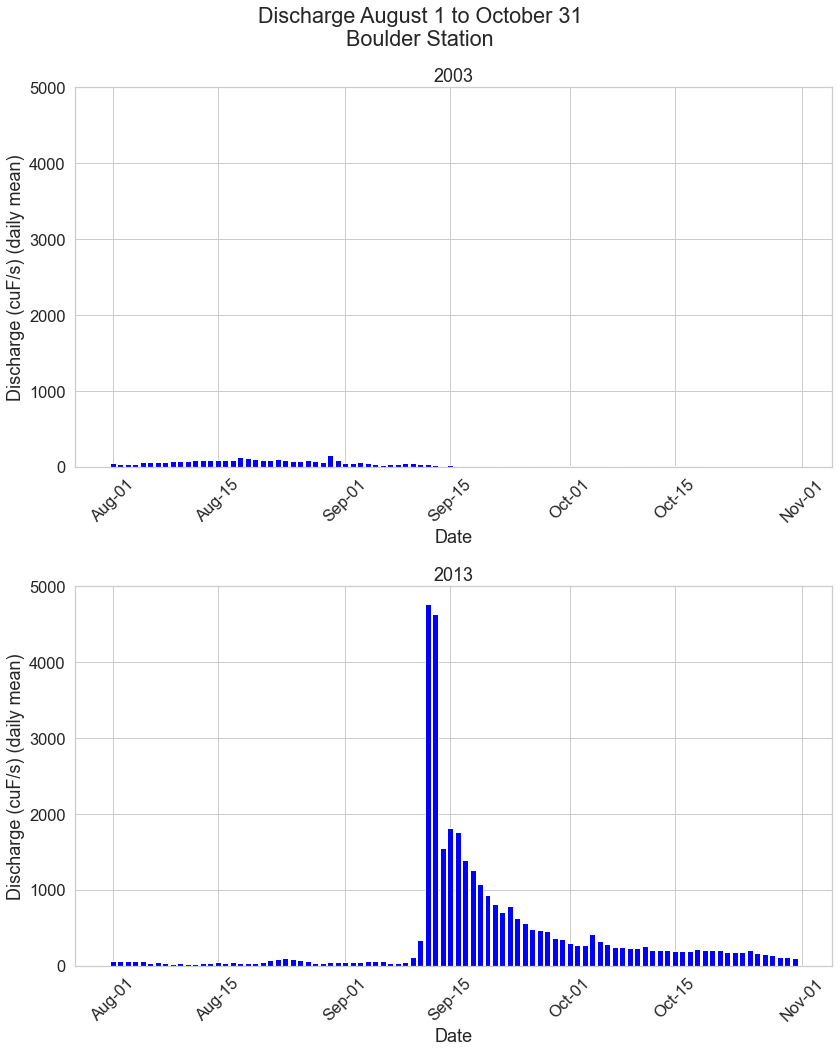

In [13]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(12,15))
f.suptitle('Discharge August 1 to October 31\nBoulder Station')


ax1.bar(stream_discharge_aug_oct_2003.index.values,
        stream_discharge_aug_oct_2003['disValue'],
        color='blue')
ax1.set(xlabel='Date',
        ylabel='Discharge (cuF/s) (daily mean)',
        title='2003',
        ylim=[0,5000])
ax1.tick_params('x', rotation=45)
ax1.xaxis.set_major_formatter(date_form)

ax2.bar(stream_discharge_aug_oct_2013.index.values,
        stream_discharge_aug_oct_2013['disValue'],
        color='blue')
ax2.set(xlabel='Date',
        ylabel='Discharge (cuF/s) (daily mean)',
        title='2013',
        ylim=[0,5000])
ax2.tick_params('x', rotation=45)
ax2.xaxis.set_major_formatter(date_form)

f.tight_layout(w_pad=5)

#### Bonus Challenge 1: Get Data from Hydrofunctions

In [14]:
import hydrofunctions as hf

In [15]:
# Define site number and start/end dates

site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

In [16]:
# Request data

longmont_resp = hf.get_nwis(site, 'dv', start, end)
longmont_resp

<Response [200]>

In [17]:
type(longmont_resp)

requests.models.Response

In [18]:
longmont_resp.ok

True

Convert the response to json in order to use the extract_nswis_df function

In [19]:
longmont_resp = longmont_resp.json()

In [20]:
longmont_discharge = hf.extract_nwis_df(longmont_resp)
longmont_discharge.head()

,USGS:06730500:00060:00003,USGS:06730500:00060:00003_qualifiers
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


Change column names

In [21]:
longmont_discharge.columns = ['discharge', 'flags']
longmont_discharge.head()

,discharge,flags
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


In [22]:
longmont_discharge_1970_pres = longmont_discharge['1970':]
longmont_discharge_1970_pres.head()

,discharge,flags
datetime,,
1978-09-14,7.3,A
1978-09-15,4.0,A
1978-09-16,4.5,A
1978-09-17,4.9,A
1978-09-18,5.5,A


In [23]:
longmont_discharge_1970_pres.tail()

,discharge,flags
datetime,,
2018-08-25,9.86,A
2018-08-26,7.02,A
2018-08-27,4.05,A
2018-08-28,2.67,A
2018-08-29,3.36,A


In [24]:
longmont_discharge_1970_pres_yearly = longmont_discharge_1970_pres.resample('Y').max()

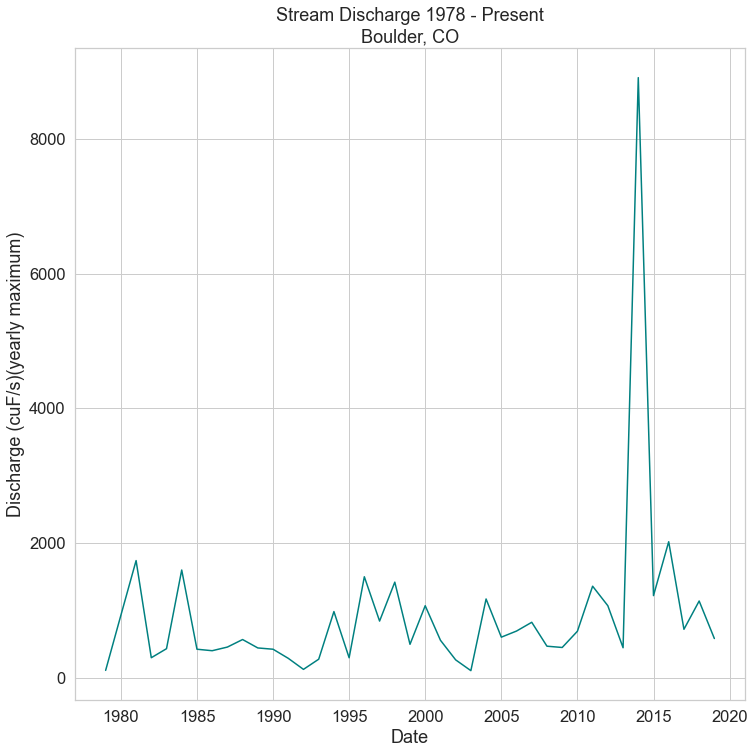

In [25]:
f, ax = plt.subplots(figsize=(12,12))

date_form_yearly = DateFormatter('%Y')

ax.plot(longmont_discharge_1970_pres_yearly.index.values,
       longmont_discharge_1970_pres_yearly['discharge'],
       color='teal')
ax.set(xlabel='Date',
       ylabel='Discharge (cuF/s)(yearly maximum)',
       title='Stream Discharge 1978 - Present\nBoulder, CO')
ax.xaxis.set_major_formatter(date_form_yearly)

#### Bonus Challenge 2: Plot Precipitation and Stream Discharge in One Figure

In [26]:
data_path = et.data.get_data('colorado-flood')

In [27]:
file_path = os.path.join(data_path, 'precipitation', '805325-precip-daily-2003-2013.csv')
file_path

'C:\\Users\\Glen Shennan\\earth-analytics\\data\\colorado-flood\\.\\precipitation\\805325-precip-daily-2003-2013.csv'

In [28]:
precip_daily_2003_2013 = pd.read_csv(file_path,
                                     parse_dates=['DATE'],
                                     index_col=['DATE'],
                                     na_values=['999.99'])
precip_daily_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [29]:
precip_daily_2013 = precip_daily_2003_2013.loc['2013']
precip_daily_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-01-28 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-01-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-02-14 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


In [30]:
precip_weekly_2013 = precip_daily_2013.resample('w').sum()
precip_weekly_2013.head()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2013-01-06,1650.5,40.0338,-105.2811,0.0
2013-01-13,0.0,0.0000,0.0000,0.0
2013-01-20,0.0,0.0000,0.0000,0.0
2013-01-27,0.0,0.0000,0.0000,0.0
2013-02-03,4951.5,120.1014,-315.8433,0.2


In [31]:
longmont_discharge_2013 = longmont_discharge.loc['2013']
longmont_discharge_2013.head()

,discharge,flags
datetime,,
2013-01-01,34.9,A e
2013-01-02,35.0,A e
2013-01-03,34.5,A e
2013-01-04,34.5,A e
2013-01-05,34.2,A e


In [32]:
longmont_discharge_2013_weekly_max = longmont_discharge_2013.resample('w').max()
longmont_discharge_2013_weekly_max.head()

,discharge,flags
datetime,,
2013-01-06,35.0,A e
2013-01-13,35.4,A e
2013-01-20,35.8,A e
2013-01-27,39.9,A e
2013-02-03,42.2,A


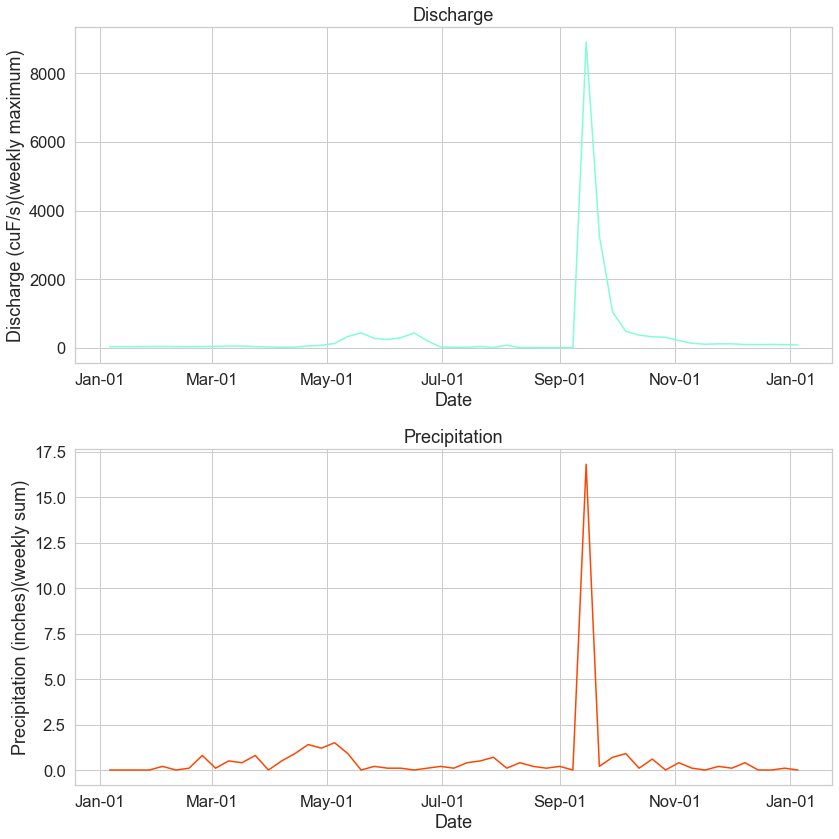

In [33]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

date_form = DateFormatter('%b-%d')

ax1.plot(longmont_discharge_2013_weekly_max.index.values,
         longmont_discharge_2013_weekly_max['discharge'],
         color='aquamarine')
ax1.set(xlabel='Date',
        ylabel='Discharge (cuF/s)(weekly maximum)',
        title = 'Discharge')
ax1.xaxis.set_major_formatter(date_form)

ax2.plot(precip_weekly_2013.index.values,
         precip_weekly_2013['HPCP'],
         color='orangered')
ax2.set(xlabel='Date',
        ylabel='Precipitation (inches)(weekly sum)',
        title = 'Precipitation')
ax2.xaxis.set_major_formatter(date_form)

f.tight_layout(w_pad=10)